<div style="text-align: center; padding: 10px; background-color: #9be8fc; color:#000000; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">ROAD ACCIDENT CASUALTIES PREDICTION SYSTEM</div>


### https://www.kaggle.com/code/pavankumarmantha/deep-eda-on-accidents New Insight for EDA

<div style="text-align: center; padding: 10px;  background-color: #514752; color:#ffffff; font-size: 25px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">JOSEPHINE TAIWO KAYODE</div>

><img src = "image/image.jpg" style="display: block; margin: auto;" />/>

<div style="text-align: Left; padding: 10px; background-color: #9be8fc; color:#000000; font-size: 26px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">1.0 INTRODUCTION</div>

In the realm of road safety, the ability to predict and prevent accidents is of paramount importance. Road accidents not only result in property damage but more significantly, they lead to injuries and fatalities, posing a significant threat to public safety. To address this critical issue, the Road Accident Casualties Prediction System is designed to harness the power of data science to forecast the likelihood of accidents and casualties on roadways.

#### 1.1 IMPORT PACKAGES

Pandas (pd): Pandas is a powerful library for data manipulation and analysis. It provides data structures like DataFrame, which is particularly useful for handling and analyzing structured data, such as the historical accident data you'll be working with.

NumPy (np): NumPy is a fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays. This is essential for numerical operations and working with machine learning algorithm

Matplotlib (plt): Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It's particularly useful for generating plots and charts to visualize patterns and trends in accident data.

Seaborn (sns): Seaborn is built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics. It simplifies the process of creating complex visualizations, making it easier to explore relationships between different variable

scikit-learn (sklearn): Scikit-learn is a machine learning library that provides simple and efficient tools for data mining and data analysis.s.s.

In [49]:
# data loading and manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)


# data modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# data evaluation 
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pickle as pkl


import warnings
warnings.filterwarnings("ignore")

#### 1.2 IMPORT DATASET

This import dataset section serves as the foundational step in our data science journey. It connects us to the raw data, transforms it into a manageable format, and provides an initial glimpse into its characteristics. As we proceed, we'll delve deeper into the dataset, exploring patterns, cleaning inconsistencies, and ultimately developing a predictive model for road accident casualties.

In [50]:
df = pd.read_csv('dataset/train.csv')

<div style="text-align: Left; padding: 10px; background-color: #9be8fc; color:#000000; font-size: 26px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">1.0 EXPLORATORY DATA ANALYSIS</div>

As we embark on the journey to develop a Road Accident Casualties Prediction System, one of the pivotal phases of our data science project is Exploratory Data Analysis (EDA). EDA serves as the compass that guides us through the intricate landscape of our dataset, providing insights, uncovering patterns, and paving the way for informed decision-making.

## 1.1 PRELIMINARY ANALYSIS

Preliminary analysis, also known as initial analysis, refers to the early stage of data examination conducted to get a first look at the dataset and gain a basic understanding of its characteristics. This stage is crucial in data analysis as it helps identify patterns, trends, potential issues, and initial insights before deeper analyses.

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

We discovered that the dataset has 14 columns with 66,0679 entries. 

Some of the independent variables are Objects (Index, Accident_Severity, Accident Light_Conditions,  District Area, Road_Surface_Conditions, Road_Type, Urban_or_Rural_Area,  Weather_Conditions, Vehicle_Type) 

while some are Numeric(Latitude, Longitude, Number_of_Vehicles). 

The Target variable is "Number_of_Casualties" which is numerical. The dataset contains no unnamed variable.

In [137]:
df["District Area"]

0         Kensington and Chelsea
1         Kensington and Chelsea
2         Kensington and Chelsea
3         Kensington and Chelsea
4         Kensington and Chelsea
                   ...          
660674                  Highland
660675                  Highland
660676                  Highland
660677                  Highland
660678                  Highland
Name: District Area, Length: 660679, dtype: object

In [138]:
df.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [139]:
df.isna().sum()#To know the number of missing values in each column

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

## 1.2 UNIVARIATE & BIVARIATE ANALYSIS

Univariate Analysis: univariate analysis involves the analysis of a single variable. It focuses on examining the distribution, summary statistics, and patterns within one variable at a time.

Bivariate Analysis:  bivariate analysis involves the analysis of the relationship between two variables. It explores how the values of one variable may be related to the values of another.

### 1.2.1 Univariate Analysis

<Axes: xlabel='Accident_Severity', ylabel='count'>

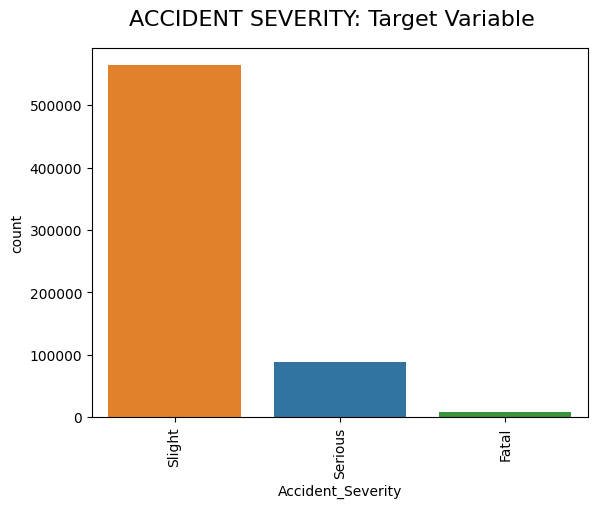

In [140]:
plt.xticks(rotation = 90)

plt.suptitle("ACCIDENT SEVERITY: Target Variable", size = 16, y = 0.96);

sns.countplot(x = "Accident_Severity", data = df, hue = "Accident_Severity", order=df['Accident_Severity'].value_counts(ascending=False).index)

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64


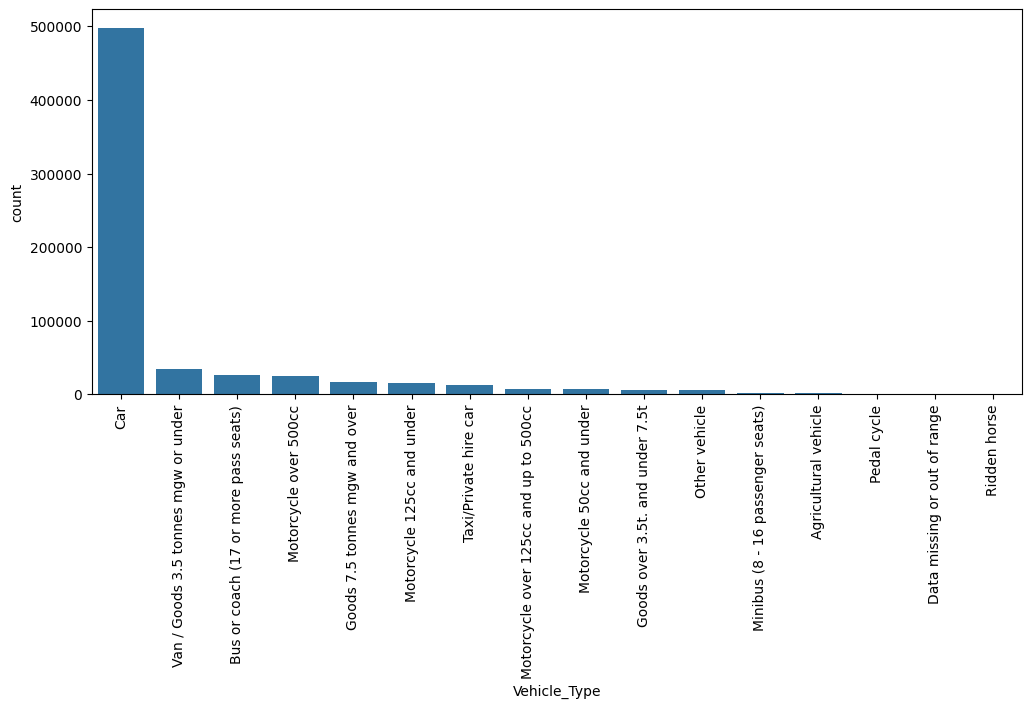

In [141]:
print(df["Vehicle_Type"].value_counts())
plt.figure(figsize=(12,5))
plot = sns.countplot(data=df,x="Vehicle_Type", order=df['Vehicle_Type'].value_counts(ascending=False).index)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

In [142]:
# Convert 'Accident Date' to datetime format
df['Accident Date'] = pd.to_datetime(df['Accident Date'], format="%d-%m-%Y")


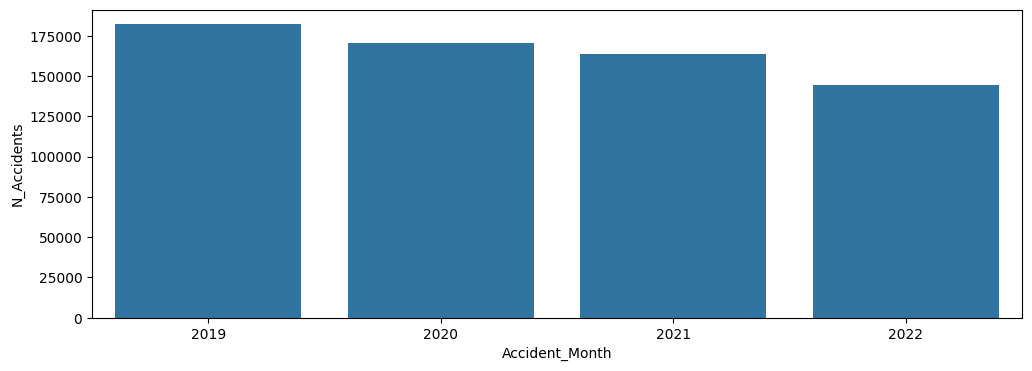

In [143]:
# Extract the month from the 'Accident Date'
df['Accident_Month'] = df['Accident Date'].dt.year

# Calculate the count of accidents by month
df_accidents_by_month = df.groupby('Accident_Month').agg({'Accident_Severity': 'count'})
df_accidents_by_month.rename(columns={'Accident_Severity': 'N_Accidents'}, inplace=True)

plt.figure(figsize = (12, 4), facecolor = "white")

frequency_accidents = df_accidents_by_month.sort_values(by = 'N_Accidents', ascending = False)
sns.barplot(
    data = df_accidents_by_month, 
    x = df_accidents_by_month.index, y = 'N_Accidents',
    order = frequency_accidents.index
)

plt.show()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64


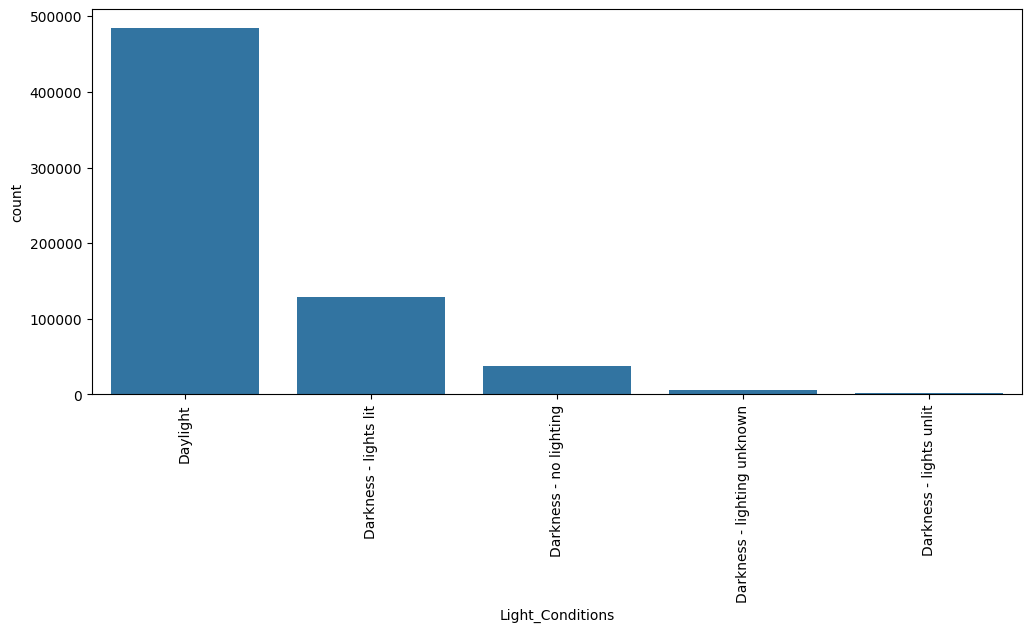

In [144]:
print(df["Light_Conditions"].value_counts())
plt.figure(figsize=(12,5))
plot = sns.countplot(data=df,x="Light_Conditions", order=df['Light_Conditions'].value_counts(ascending=False).index)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

### 1.2.2 Bivariate Analysis

In [145]:
df.set_index('Accident Date', inplace=True)

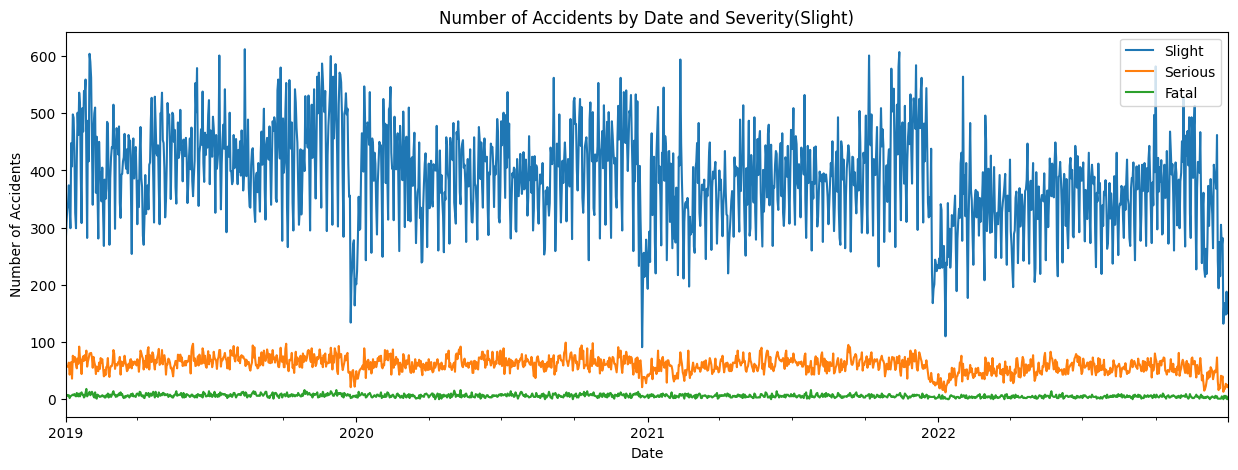

In [146]:
plt.figure(figsize=(15,5))

subset = df[df['Accident_Severity'] == "Slight"]
subset.resample('D').size().plot(label="Slight")
subset = df[df['Accident_Severity'] == "Serious"]
subset.resample('D').size().plot(label="Serious")
subset = df[df['Accident_Severity'] == "Fatal"]
subset.resample('D').size().plot(label="Fatal")

plt.title('Number of Accidents by Date and Severity(Slight)')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

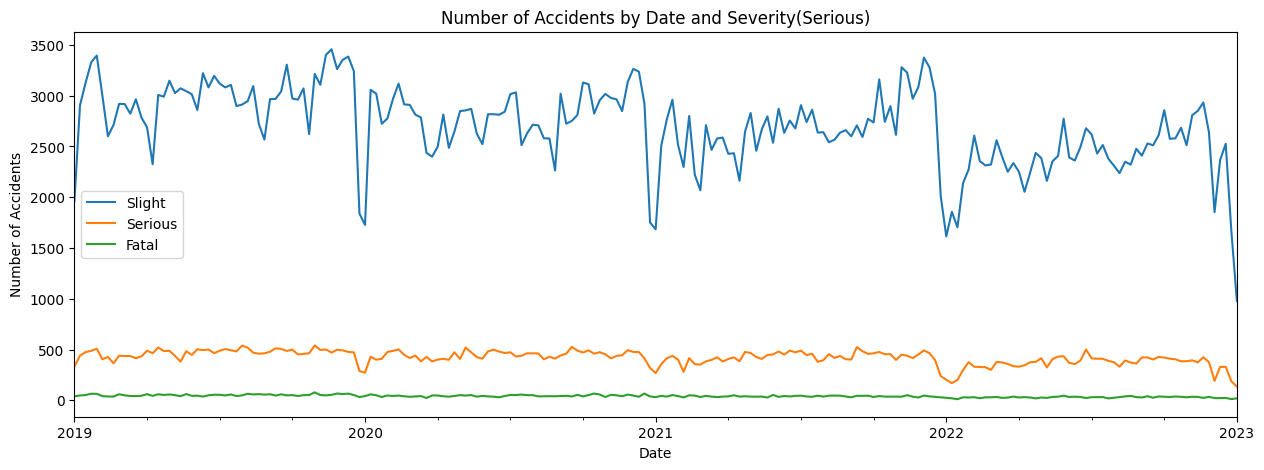

In [147]:
plt.figure(figsize=(15,5))

subset = df[df['Accident_Severity'] == "Slight"]
subset.resample('W').size().plot(label="Slight")
subset = df[df['Accident_Severity'] == "Serious"]
subset.resample('W').size().plot(label="Serious")
subset = df[df['Accident_Severity'] == "Fatal"]
subset.resample('W').size().plot(label="Fatal")

plt.title('Number of Accidents by Date and Severity(Serious)')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()


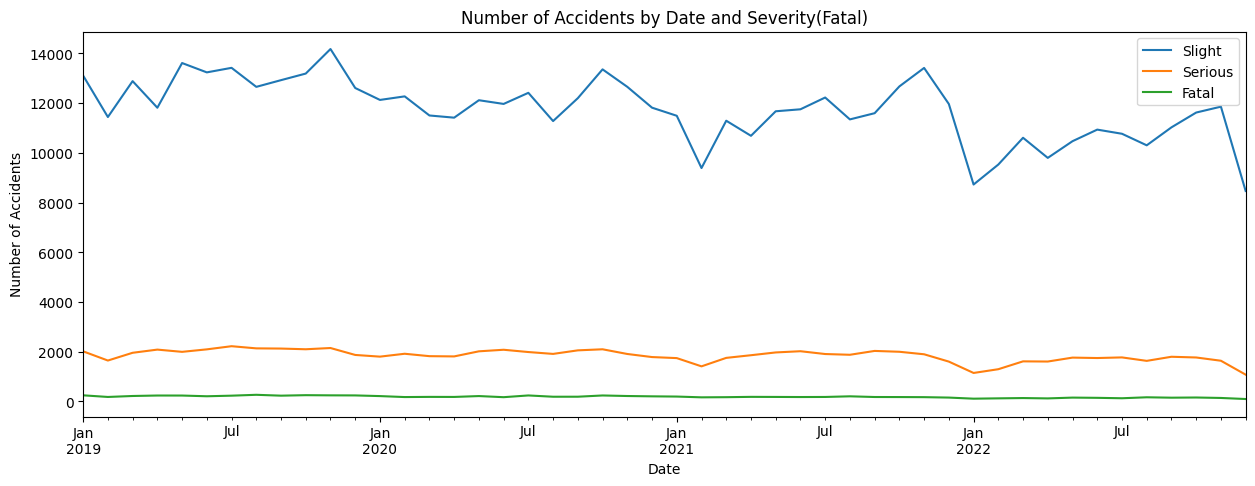

In [148]:
plt.figure(figsize=(15,5))

subset = df[df['Accident_Severity'] == "Slight"]
subset.resample('M').size().plot(label="Slight")
subset = df[df['Accident_Severity'] == "Serious"]
subset.resample('M').size().plot(label="Serious")
subset = df[df['Accident_Severity'] == "Fatal"]
subset.resample('M').size().plot(label="Fatal")

plt.title('Number of Accidents by Date and Severity(Fatal)')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

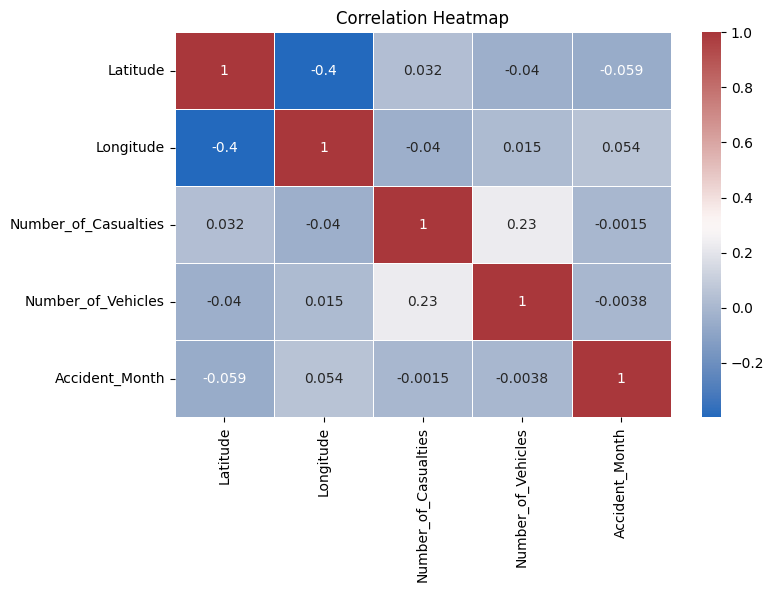

In [149]:
# correlation matrix
plt.figure(figsize = (8, 5), facecolor = "white")

# plotting
sns.heatmap(
    data = df.corr(numeric_only = True),
    cmap = "vlag",
    linewidth = 0.5,
    annot = True,
)

plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Accident_Severity', ylabel='count'>

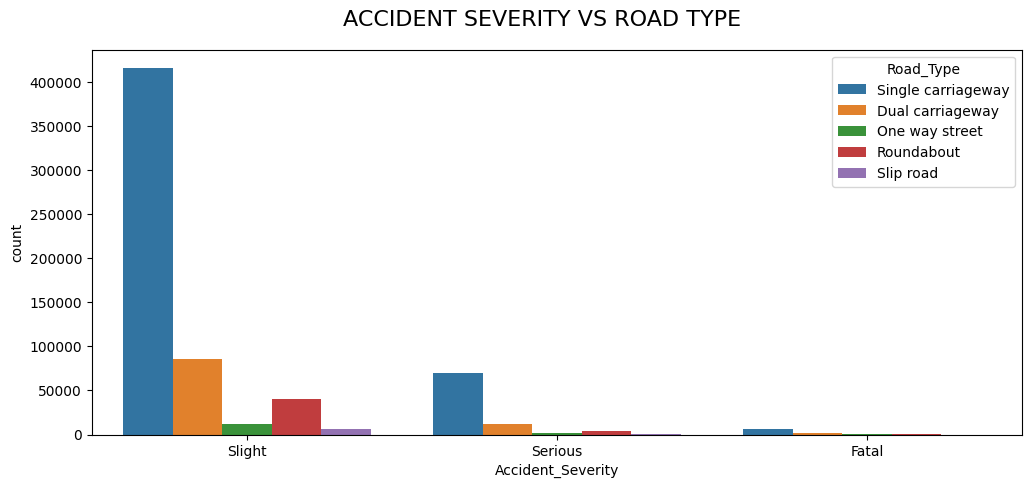

In [150]:
plt.figure(figsize=(12,5))
plt.suptitle("ACCIDENT SEVERITY VS ROAD TYPE", size = 16, y = 0.96);
sns.countplot(df, x="Accident_Severity", hue="Road_Type", order=df['Accident_Severity'].value_counts(ascending=False).index)

<Axes: xlabel='Accident_Severity', ylabel='count'>

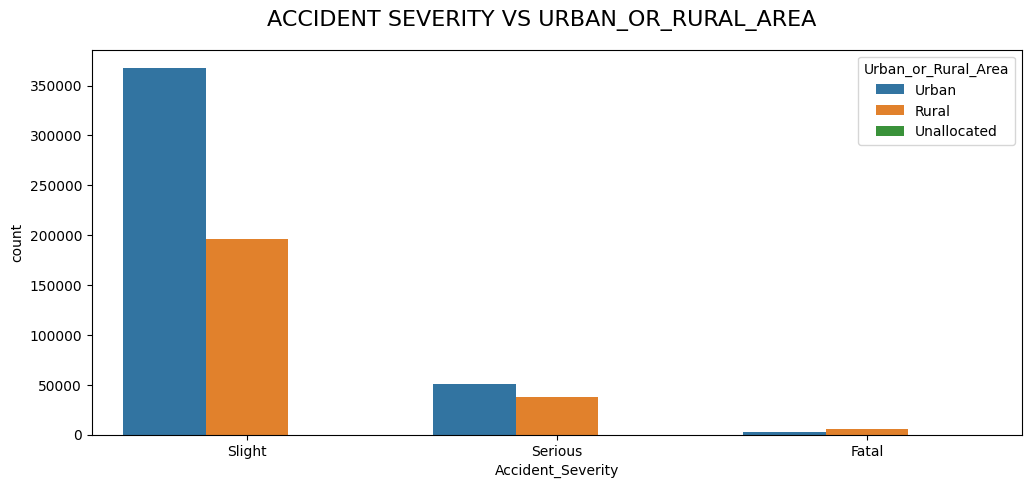

In [151]:
plt.figure(figsize=(12,5))
plt.suptitle("ACCIDENT SEVERITY VS URBAN_OR_RURAL_AREA", size = 16, y = 0.96);
sns.countplot(df, x="Accident_Severity", hue="Urban_or_Rural_Area", order=df["Accident_Severity"].value_counts(ascending=False).index)

<Axes: xlabel='Accident_Severity', ylabel='count'>

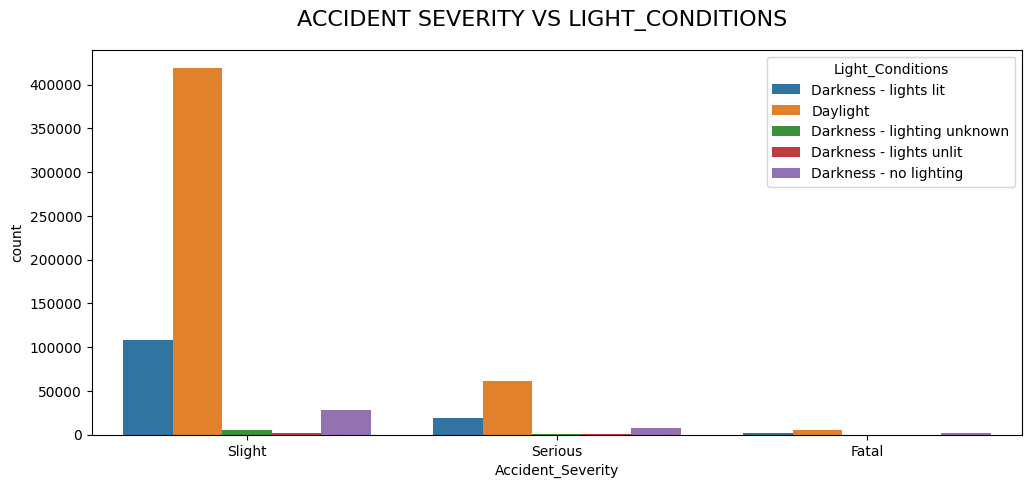

In [152]:
plt.figure(figsize=(12,5))
plt.suptitle("ACCIDENT SEVERITY VS LIGHT_CONDITIONS", size = 16, y = 0.96);
sns.countplot(df, x="Accident_Severity", hue="Light_Conditions", order=df["Accident_Severity"].value_counts(ascending=False).index)

<div style="text-align: Left; padding: 10px; background-color: #9be8fc; color:#000000; font-size: 26px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">3.0 DATA PREPROCESSING</div>

Time to prep our data for the spotlight! In the Data Preprocessing phase, we'll clean, organize, and get our dataset ready for the main stage. It's like setting the scene before a performance—handling missing values, smoothing out rough edges, and ensuring our data is in tip-top shape.

In this phase, the OneHotEncoder was employed as a crucial component. This encoder was employed to transform the categorical variables into a numerical format, to facilitate the inclusion of the variables in the selected machine learning model.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [52]:
df["Latitude"] = df["Latitude"].fillna(df["Latitude"].mode()[0])
df["Longitude"] = df["Longitude"].fillna(df["Longitude"].mode()[0])
df["Road_Surface_Conditions"] = df["Road_Surface_Conditions"].fillna(df["Road_Surface_Conditions"].mode()[0])
df["Road_Type"] = df["Road_Type"].fillna(df["Road_Type"].mode()[0])
df["Urban_or_Rural_Area"] = df["Urban_or_Rural_Area"].fillna(df["Urban_or_Rural_Area"].mode()[0])
df["Weather_Conditions"] = df["Weather_Conditions"].fillna(df["Weather_Conditions"].mode()[0])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

Within the canvas of our Road accident casualties Project, One-Hot Encoding and Label Encoding emerge as the crafting tools, sculpting our categorical data into a format that resonates with the predictive intricacies of our segmentation models. The strategic application of these techniques ensures a seamless transition from raw data to a structured foundation for effective model training.

### USING OneHotEncoder

In [54]:
Encode_me = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
print(Encode_me)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)


In [55]:
Seg = Encode_me.fit_transform(df[["Light_Conditions", "Road_Surface_Conditions", "Road_Type",  "Urban_or_Rural_Area", "Weather_Conditions", "Vehicle_Type"]])

In [56]:
print(Seg)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [57]:
feature_names = Encode_me.get_feature_names_out(["Light_Conditions", "Road_Surface_Conditions", "Road_Type",  "Urban_or_Rural_Area", "Weather_Conditions", "Vehicle_Type"])

In [58]:
onehot_df = pd.DataFrame(Seg, columns = feature_names)

In [59]:
df = pd.concat([df, onehot_df], axis = 1).drop(columns = ["Light_Conditions", "Road_Surface_Conditions", "Road_Type", "Urban_or_Rural_Area", "Weather_Conditions", "Vehicle_Type"])

### Drop Date

In [62]:
df.drop("Accident Date", axis = 1, inplace = True)

### USING LabelEncoder

In [63]:
df["District Area"]

0         Kensington and Chelsea
1         Kensington and Chelsea
2         Kensington and Chelsea
3         Kensington and Chelsea
4         Kensington and Chelsea
                   ...          
660674                  Highland
660675                  Highland
660676                  Highland
660677                  Highland
660678                  Highland
Name: District Area, Length: 660679, dtype: object

In [64]:
df = df.drop("Index", axis = 1)

In [65]:
District_encoder = LabelEncoder()
Accident_encoder = LabelEncoder()

In [66]:
df["District Area"] = District_encoder.fit_transform(df["District Area"])
df["Accident_Severity"] = Accident_encoder.fit_transform(df["Accident_Severity"])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Accident_Severity                                   660679 non-null  int32  
 1   Latitude                                            660679 non-null  float64
 2   District Area                                       660679 non-null  int32  
 3   Longitude                                           660679 non-null  float64
 4   Number_of_Casualties                                660679 non-null  int64  
 5   Number_of_Vehicles                                  660679 non-null  int64  
 6   Light_Conditions_Darkness - lighting unknown        660679 non-null  float64
 7   Light_Conditions_Darkness - lights lit              660679 non-null  float64
 8   Light_Conditions_Darkness - lights unlit            660679 non-n

## 3.2 SPLITTING THE DATASET INTO TRAIN AND TEST

Let's divide and conquer! In this section, we're splitting our data into two squads: the Training Team and the Test Team.

The Training Team will learn the patterns and tricks from our dataset, while the Test Team will show us how well they've mastered it. Think of it as preparing for a big game – we train hard and then test our skills.

In this case, 80% of the dataset was kept for training and the remaining 20% for splitting.

Get ready for some data athleticism!

In [68]:
df["Accident_Severity"]

0         1
1         1
2         1
3         1
4         2
         ..
660674    2
660675    2
660676    2
660677    1
660678    1
Name: Accident_Severity, Length: 660679, dtype: int32

In [69]:
y = df["Accident_Severity"]
X = df.drop("Accident_Severity", axis = 1)

In [70]:
y

0         1
1         1
2         1
3         1
4         2
         ..
660674    2
660675    2
660676    2
660677    1
660678    1
Name: Accident_Severity, Length: 660679, dtype: int32

In [71]:
X

,Latitude,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Light_Conditions_Darkness - lighting unknown,Light_Conditions_Darkness - lights lit,Light_Conditions_Darkness - lights unlit,Light_Conditions_Darkness - no lighting,Light_Conditions_Daylight,...,Vehicle_Type_Minibus (8 - 16 passenger seats),Vehicle_Type_Motorcycle 125cc and under,Vehicle_Type_Motorcycle 50cc and under,Vehicle_Type_Motorcycle over 125cc and up to 500cc,Vehicle_Type_Motorcycle over 500cc,Vehicle_Type_Other vehicle,Vehicle_Type_Pedal cycle,Vehicle_Type_Ridden horse,Vehicle_Type_Taxi/Private hire car,Vehicle_Type_Van / Goods 3.5 tonnes mgw or under
0,51.506187,185,-0.209082,1,2,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,51.495029,185,-0.173647,1,2,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51.517715,185,-0.210215,1,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,51.495478,185,-0.202731,1,4,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51.488576,185,-0.192487,1,2,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,57.374005,172,-3.467828,2,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660675,57.232273,172,-3.809281,1,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660676,57.585044,172,-3.862727,1,3,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660677,57.214898,172,-3.823997,1,2,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [72]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2)

<div style="text-align: Left; padding: 10px; background-color: #9be8fc; color:#000000; font-size: 26px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">4.0 MODELLING AND EVALUATION</div>

In [73]:
performance_table = {}

In [74]:
model ='Random Forest', 'Desicion Tree', 'KNN', "LogisticRegression"

In [75]:
Model = model

### 4.1 DECISION TREE CLASSIFIER

In [76]:
model1 = DecisionTreeClassifier()

In [77]:
model1.fit(trainX, trainy)
pred1 = model1.predict(testX)
pred1

array([2, 2, 2, ..., 1, 2, 2])

In [78]:
print(classification_report(pred1,testy))

              precision    recall  f1-score   support

           0       0.04      0.04      0.04      1861
           1       0.18      0.17      0.18     18739
           2       0.85      0.86      0.86    111536

    accuracy                           0.75    132136
   macro avg       0.36      0.36      0.36    132136
weighted avg       0.75      0.75      0.75    132136



In [81]:
report1 = classification_report(testy, pred1, target_names = ['class 0', 'class 1', 'class 2'])

recall = recall_score(pred1, testy, average='weighted')
precision = precision_score(pred1, testy, average='weighted')
fi_score = f1_score(pred1, testy, average='weighted')

performance_table.update({'Decision Tree': [recall, precision, fi_score]})
performance_table

{'Decision Tree': [0.7518314463885694, 0.746139040372396, 0.7489502109767003]}

### 4.2 LOGISTIC MODEL

In [82]:
logistic_model = LogisticRegression()

In [83]:
logistic_model.fit(trainX, trainy)

LogisticRegression()

In [84]:
pred_logistic = logistic_model.predict(testX)
pred_logistic

array([2, 2, 2, ..., 2, 2, 2])

In [85]:
print(classification_report(pred_logistic,testy))

              precision    recall  f1-score   support

           0       0.00      0.04      0.00        25
           1       0.00      0.43      0.00        44
           2       1.00      0.85      0.92    132067

    accuracy                           0.85    132136
   macro avg       0.33      0.44      0.31    132136
weighted avg       1.00      0.85      0.92    132136



In [87]:
report2 = classification_report(testy, pred_logistic, target_names = ['class 0', 'class 1', 'class 2'])

recall = recall_score(pred_logistic, testy, average='weighted')
precision = precision_score(pred_logistic, testy, average='weighted')
fi_score = f1_score(pred_logistic, testy, average='weighted')

performance_table.update({'Logistic Model': [recall, precision, fi_score]})
performance_table

{'Decision Tree': [0.7518314463885694, 0.746139040372396, 0.7489502109767003],
 'Logistic Model': [0.8522280075074166,
  0.9991499297435156,
  0.9197717967216319]}

### 4.3 RANDOM FOREST CLASSIFIER

In [88]:
Random = RandomForestClassifier()

In [89]:
Random.fit(trainX, trainy)

RandomForestClassifier()

In [90]:
Random_Predict = Random.predict(testX)

In [91]:
print(classification_report(Random_Predict,testy))

              precision    recall  f1-score   support

           0       0.01      0.04      0.01       411
           1       0.08      0.20      0.11      7079
           2       0.95      0.86      0.90    124646

    accuracy                           0.82    132136
   macro avg       0.34      0.36      0.34    132136
weighted avg       0.90      0.82      0.86    132136



In [92]:
report3 = classification_report(testy, Random_Predict, target_names = ['class 0', 'class 1', 'class 2'])

recall = recall_score(Random_Predict, testy, average='weighted')
precision = precision_score(Random_Predict, testy, average='weighted')
fi_score = f1_score(Random_Predict, testy, average='weighted')

performance_table.update({'Random Forest': [recall, precision, fi_score]})
performance_table

{'Decision Tree': [0.7518314463885694, 0.746139040372396, 0.7489502109767003],
 'Logistic Model': [0.8522280075074166,
  0.9991499297435156,
  0.9197717967216319],
 'Random Forest': [0.818860870618151, 0.8987028685142061, 0.8552094116306802]}

### 4.4 KNEIGHBOURS CLASSIFIER

In [93]:
New = KNeighborsClassifier()

In [94]:
New.fit(trainX, trainy)

KNeighborsClassifier()

In [95]:
Predict_Me = New.predict(testX)

In [96]:
print(classification_report(Predict_Me,testy))

              precision    recall  f1-score   support

           0       0.01      0.08      0.02       225
           1       0.06      0.23      0.10      4711
           2       0.97      0.86      0.91    127200

    accuracy                           0.83    132136
   macro avg       0.35      0.39      0.34    132136
weighted avg       0.93      0.83      0.88    132136



In [97]:
report4 = classification_report(testy, Predict_Me, target_names = ['class 0', 'class 1', 'class 2'])

recall = recall_score(Predict_Me, testy, average='weighted')
precision = precision_score(Predict_Me, testy, average='weighted')
fi_score = f1_score(Predict_Me, testy, average='weighted')

performance_table.update({'KNeighbours': [recall, precision, fi_score]})
performance_table

{'Decision Tree': [0.7518314463885694, 0.746139040372396, 0.7489502109767003],
 'Logistic Model': [0.8522280075074166,
  0.9991499297435156,
  0.9197717967216319],
 'Random Forest': [0.818860870618151, 0.8987028685142061, 0.8552094116306802],
 'KNeighbours': [0.8332929708784889, 0.9338935435232414, 0.8785547264860037]}

## 4.5 SAVING THE MODEL / ENCODER

In [101]:
with open ("Encoder/OneHotEncoder.pkl", "wb") as f:
    pkl.dump(Encode_me, f)

with open ("Encoder/DistrictEncoder.pkl", "wb") as f:
    pkl.dump(District_encoder, f)

with open ("Encoder/AccidentEncoder.pkl", "wb") as f:
    pkl.dump(Accident_encoder, f)


with open ("Models/DeccisionTree.pkl", "wb") as f:
    pkl.dump(model1, f)

with open ("Models/RandomForest.pkl", "wb") as f:
    pkl.dump(Random, f)

with open ("Models/KNeighborsClassifier.pkl", "wb") as f:
    pkl.dump(New, f)
    
with open ("Models/LogisticRegression.pkl", "wb") as f:
    pkl.dump(logistic_model, f)

   ## 4.6 CHOICE OF MODEL

The Logistic Regression model was chosen for its outstanding performance, boasting the highest recall and precision compared to other models.

The ensemble learning approach of Logistic regression enhances accuracy and generalization, while its feature importance analysis provides valuable insights.

With a proven ability to handle non-linearity, resilience to overfitting, and consistent performance across diverse datasets, Random Forest emerges as the optimal choice, aligning with our project's goal of achieving both high precision and recall in predictive modeling.

In [99]:
performance_table = pd.DataFrame(performance_table, index=['recall', 'precision', 'fi_score'])

performance_table = performance_table.T

performance_table

,recall,precision,fi_score
Decision Tree,0.751831,0.746139,0.748950
Logistic Model,0.852228,0.999150,0.919772
Random Forest,0.818861,0.898703,0.855209
KNeighbours,0.833293,0.933894,0.878555


<Axes: xlabel='recall', ylabel='precision'>

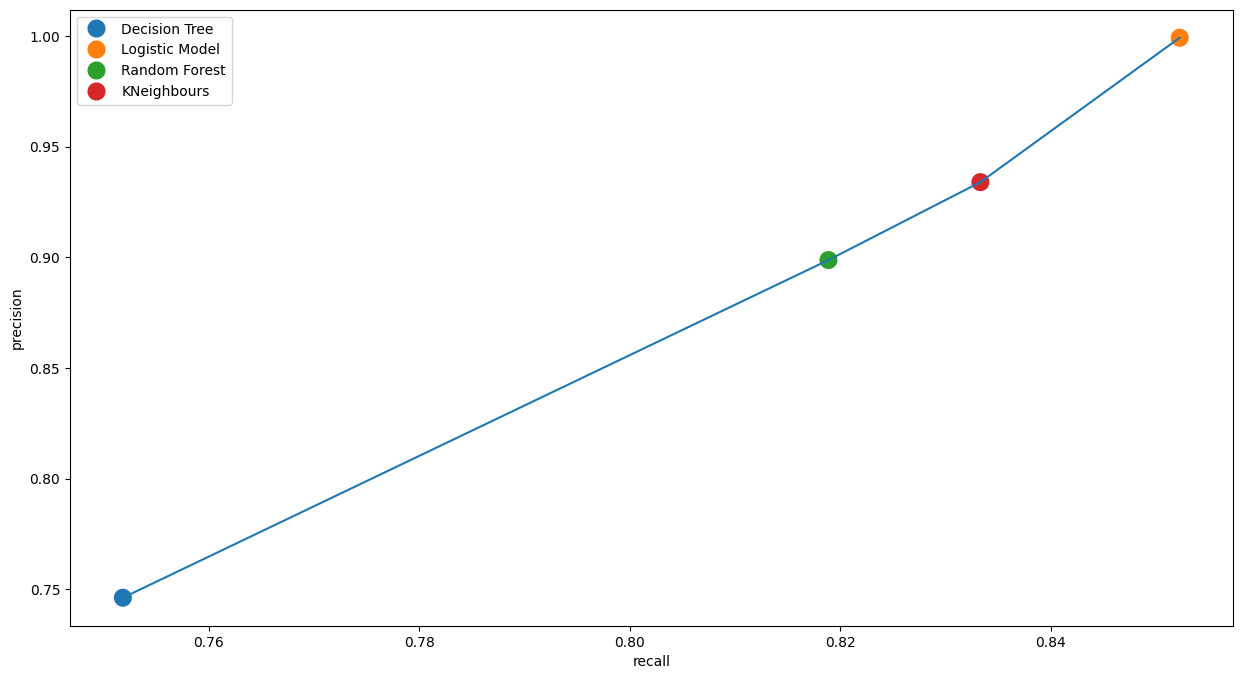

In [100]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'recall', y = 'precision', data = performance_table, hue=performance_table.index, s=200)
sns.lineplot(x = 'recall', y = 'precision', data =performance_table)


<div style="text-align: Left; padding: 10px; background-color: #9be8fc; color:#000000; font-size: 26px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">5.0 CONCLUSION</div>

Logistic regression is our winning choice for predicting road accident casualties. It's accurate, interpretable, and ready for practical use. Future enhancements will keep our predictions effective.